<a href="https://colab.research.google.com/github/mirpouya/Basics-of-ML/blob/main/Intermediate_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# generating dataset

data = pd.DataFrame({"X": np.random.normal(0,2,1000), "Y": np.random.normal(3,5,1000),
                     "Z": np.random.normal(-4,10,1000)})

data.head()

,X,Y,Z
0,-0.070419,10.489601,-1.853604
1,-3.651176,7.793405,-8.039123
2,-0.667975,13.957159,1.394604
3,-1.436192,3.497437,-6.874705
4,-1.165960,-2.559989,-4.460705


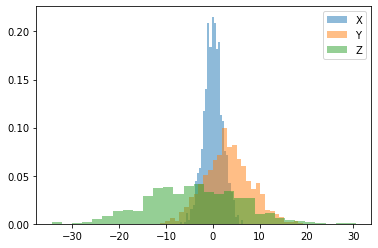

In [3]:
# plotting histograms with matplotlib

for col in data.columns:
  plt.hist(data[col], alpha=0.5, density=True, bins=30, label=col)
  plt.legend()

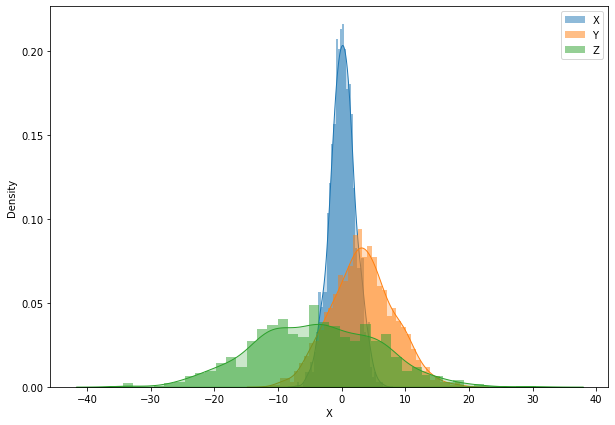

In [4]:
# plotting histograms with matplotlib

plt.figure(figsize=(10,7))

for col in data.columns:
  plt.hist(data[col], alpha=0.5, density=True, bins=40, label=col)

  # adding kernel density estimate plot
  sns.kdeplot(data[col], shade=True)
  plt.legend()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

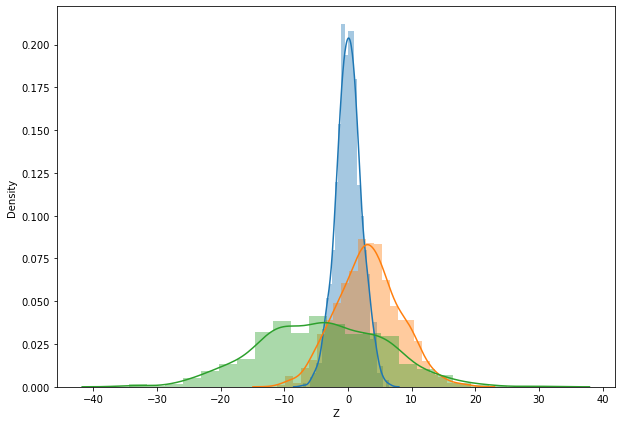

In [5]:
# doing the same with seaborn
plt.figure(figsize=(10,7))

for col in data:
  sns.distplot(data[col])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


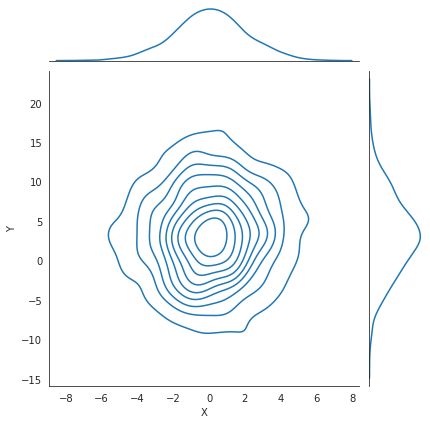

In [6]:
# joing distribution plots

with sns.axes_style("white"):
  sns.jointplot("X","Y", data, kind="kde")

In [7]:
iris = sns.load_dataset("iris")

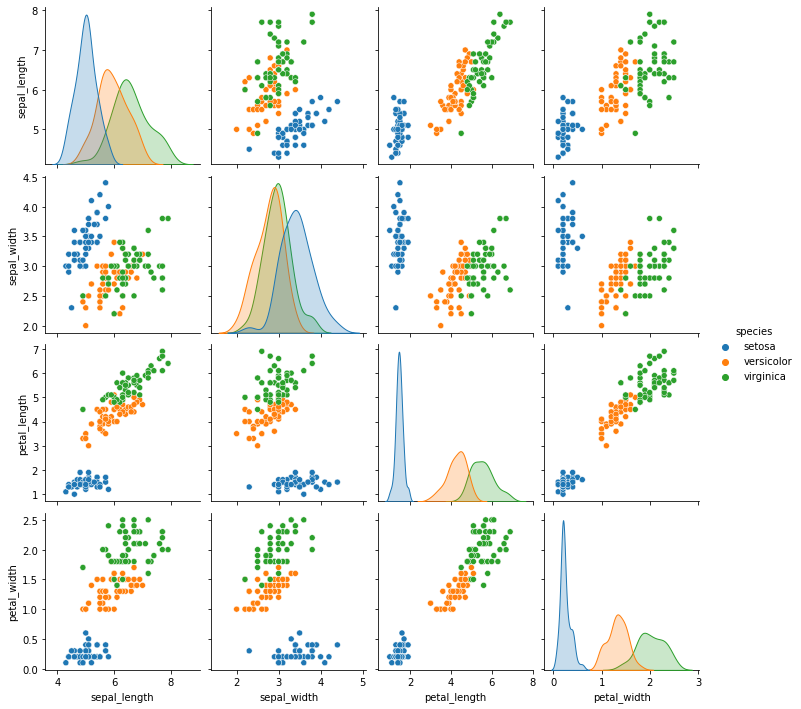

In [8]:
sns.pairplot(iris, hue="species")

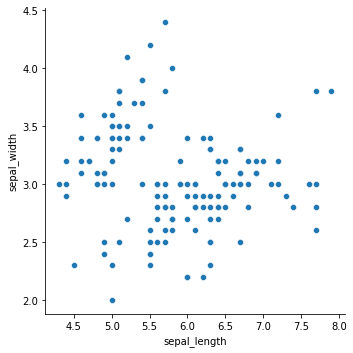

In [9]:
# relationship plot

sns.relplot(x="sepal_length", y="sepal_width", data=iris)

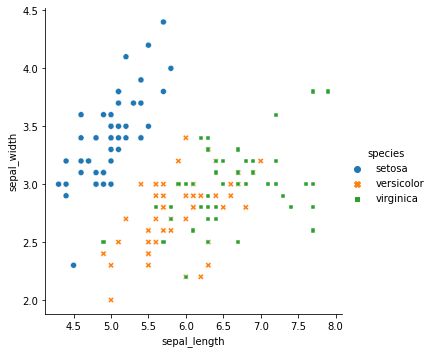

In [10]:
# relationship plot

sns.relplot(x="sepal_length", y="sepal_width", data=iris, hue="species", style="species")

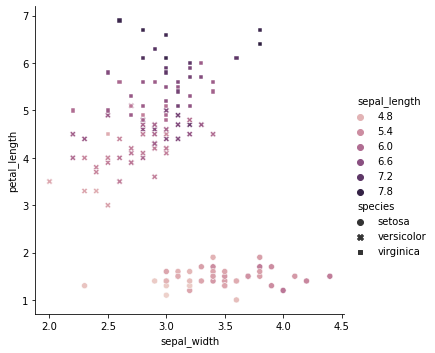

In [15]:
"""
Question: make a relationship plot using iris dataset

X = sepal width
Y = petal length  

Using sepal lenght for hue
Using species for style
"""

sns.relplot(x="sepal_width", y="petal_length", data=iris, hue="sepal_length", style="species")

In [17]:
# loading another dataset in seaborn

tips_data = sns.load_dataset("tips")

tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
# exploring the data

tips_data.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

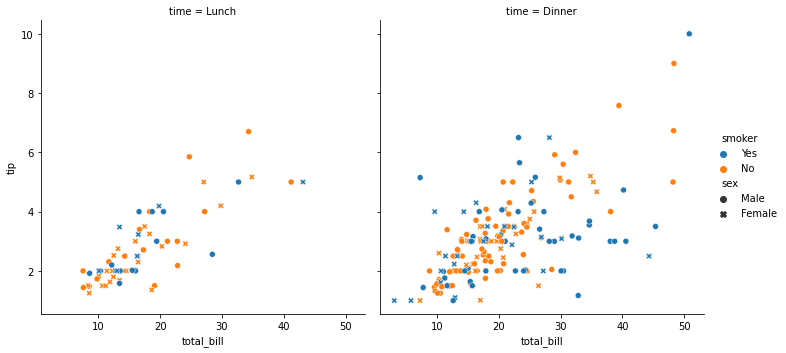

In [20]:
# sea the relationship between total bill and tip, with repect of category of somke, and what was the time, dinner or launch

sns.relplot(x="total_bill", y="tip", hue="smoker", style="sex", col="time", data=tips_data)

In [21]:
# loading fmri dataset

fmri_data = sns.load_dataset("fmri")
fmri_data.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [23]:
# how many unique subjects 
fmri_data["subject"].unique()

array(['s13', 's5', 's12', 's11', 's10', 's9', 's8', 's7', 's6', 's4',
       's3', 's2', 's1', 's0'], dtype=object)

In [27]:
len(fmri_data["subject"].unique())

14

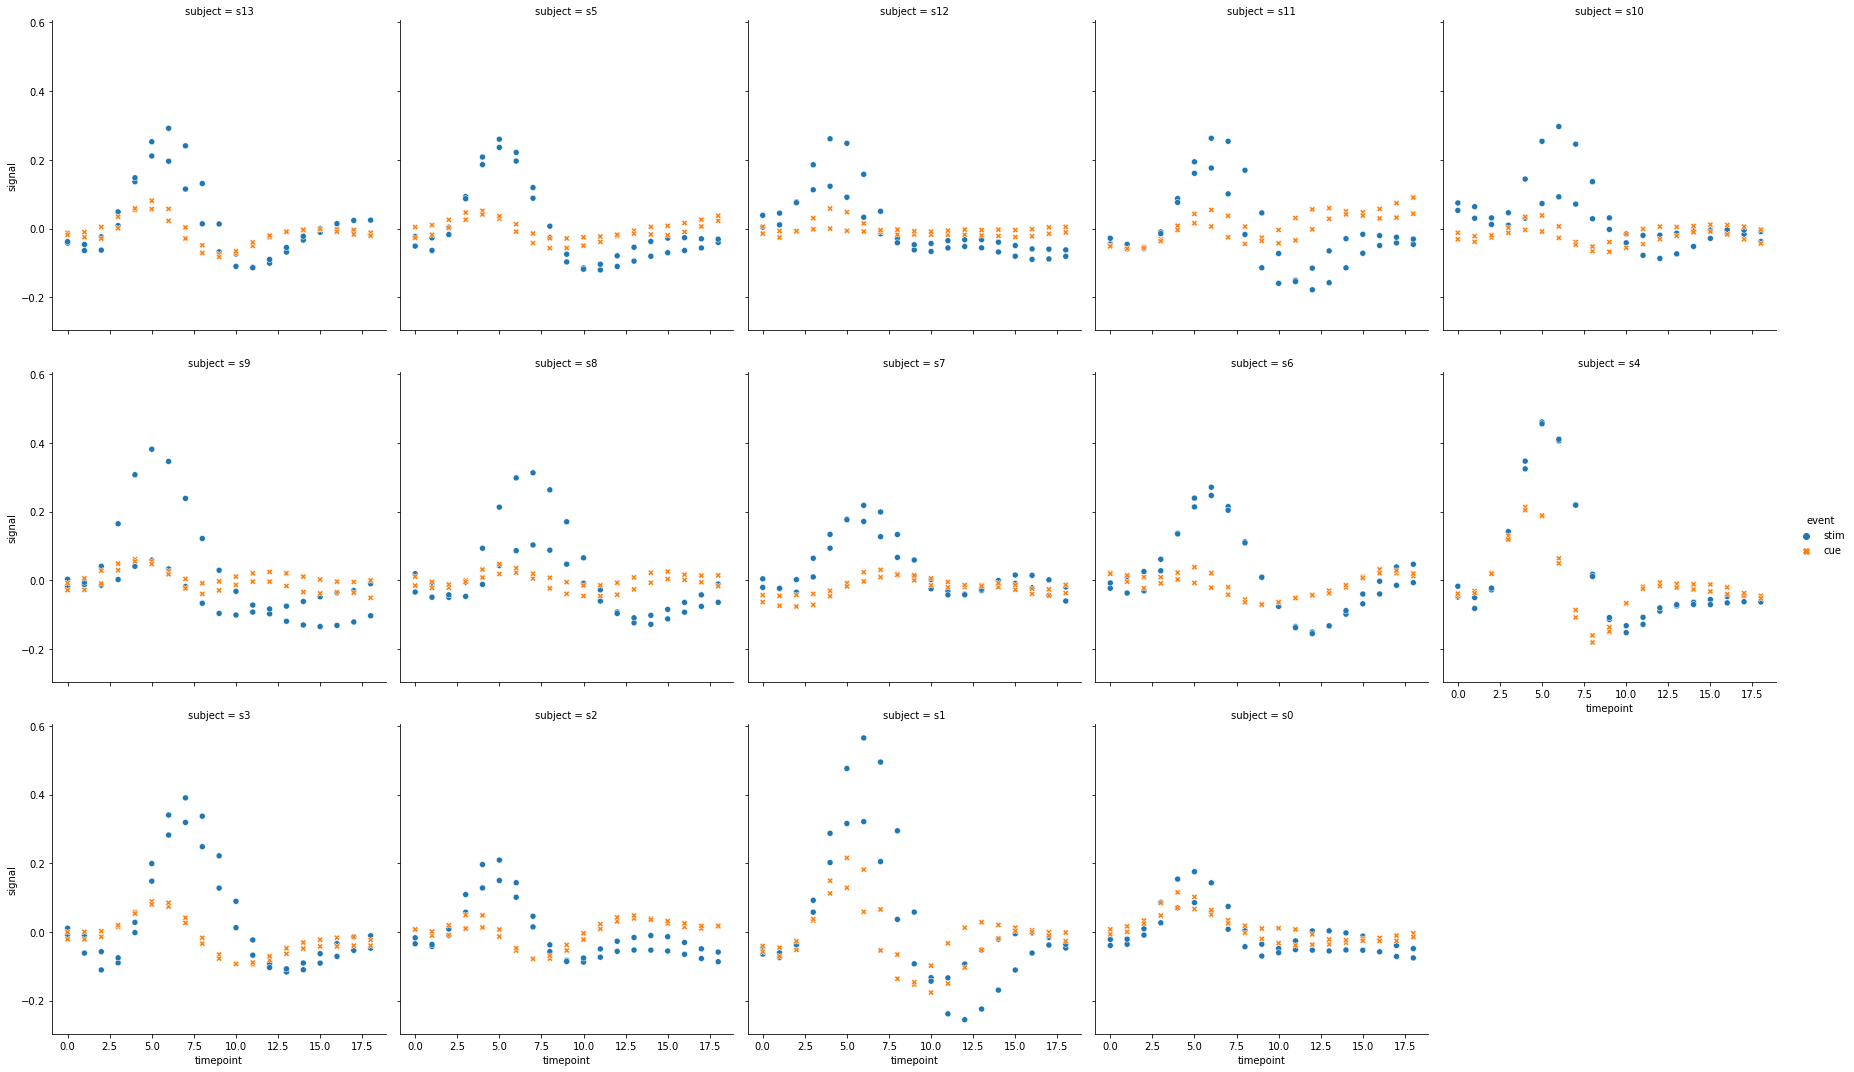

In [28]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event", col="subject", col_wrap=5, data=fmri_data)

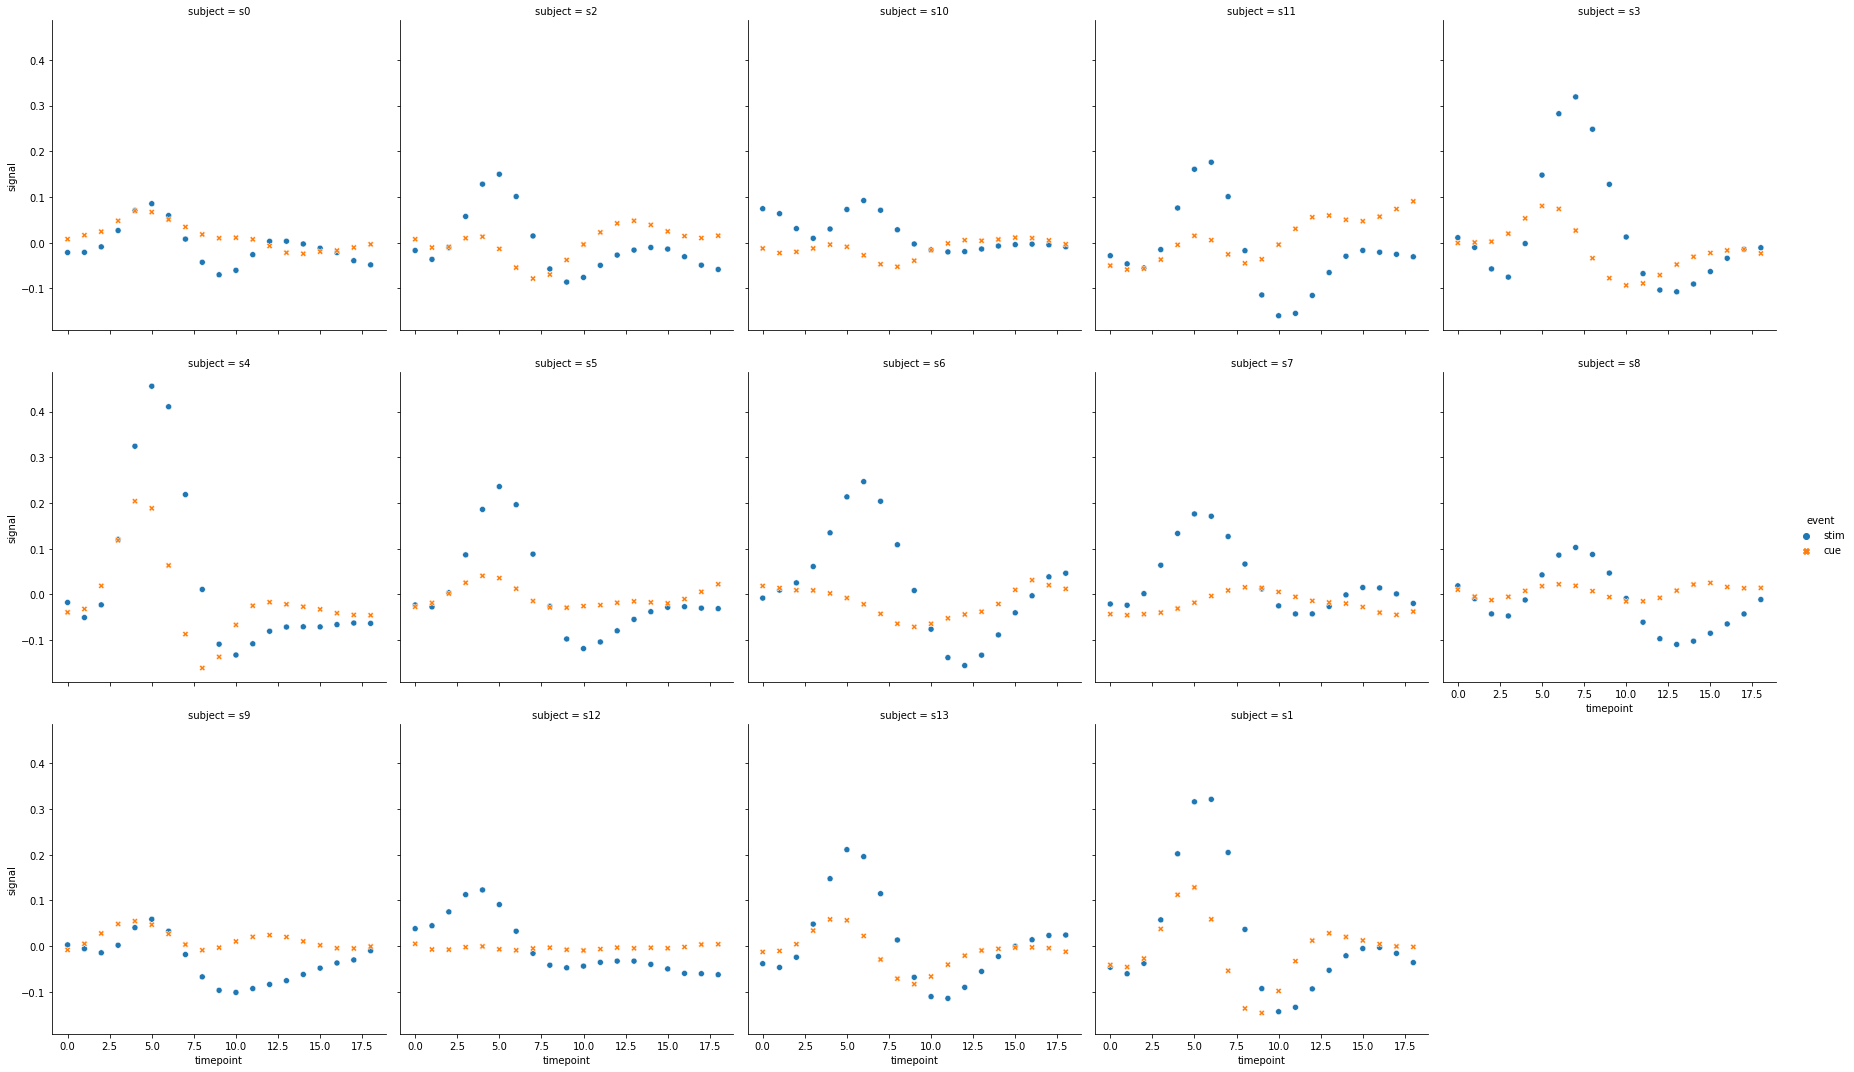

In [35]:
# picking only a part of data for example fmris which only refers to frontal part of the brain
sns.relplot(x="timepoint", y="signal", hue="event", style="event", col="subject", col_wrap=5, data=fmri_data[fmri_data["region"] == "frontal"])

In [37]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


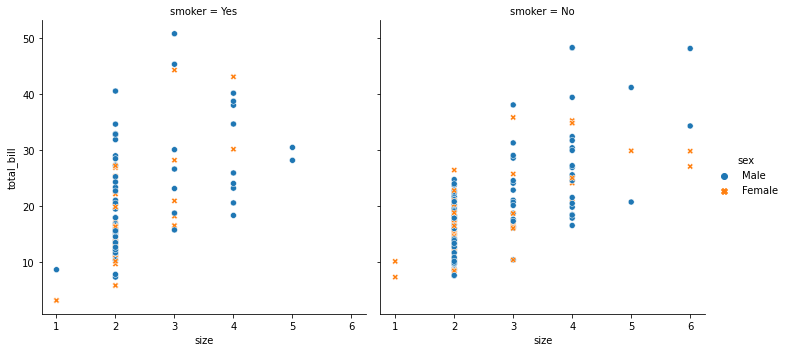

In [38]:
"""
Question: Make a relationship plot with tips dataset 

take size as x and total_bill as y
devide the columns by smoker category

set hue and style to the sex
"""

sns.relplot(x="size", y="total_bill", col="smoker", data=tips_data, hue="sex", style="sex")

In [40]:
# setting some styles for seaborn

sns.set(style="ticks", color_codes=True)

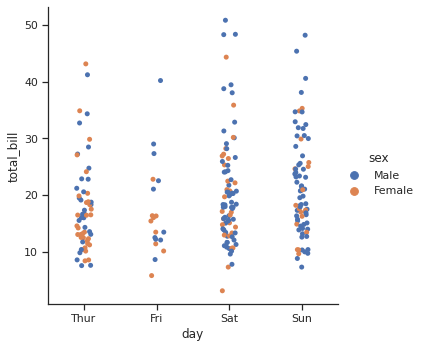

In [49]:
# seaborn categorical plots

sns.catplot(x="day", y="total_bill", hue="sex", data=tips_data)

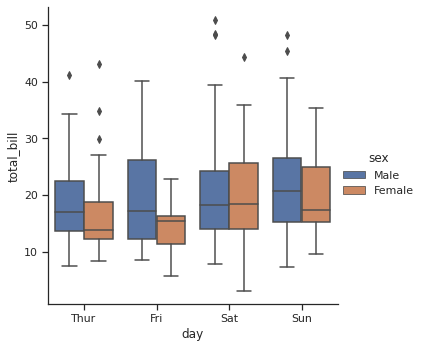

In [50]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="box", data=tips_data)